In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.integrate as intgr

In [2]:
plt.style.use('aps')
mpl.rcParams["figure.figsize"] = [3.4039, 2.10373]

In [3]:
f2 = open('lineardensity-u-reduce.dat','r')
lines = f2.readlines()
u = np.array([])
N = np.array([])
delN = np.array([])

readindex = 1
rval = len(lines) - 2
for line in lines[1:]:
    if(readindex == 1):
        p = line.split()
        for j in range(1,len(p)):
            if (j % 3 == 0):
                u = np.append(u,float(p[j]))
        r = np.zeros((len(u),rval))
        rho = np.zeros((len(u),rval))
        delrho = np.zeros((len(u),rval))
    elif(readindex == 2):
        print('Skip line')
    else:
        #print(r)
        p = line.split()
        #print(readindex)
        ind_arr = 3*np.arange(0,int(len(p)/3),1)
        for j in ind_arr:
            ind = int(j/3)
            r[ind,readindex - 3] = p[j]
            #print(p[j+1])
            rho[ind,readindex - 3] = p[j+1]
            delrho[ind,readindex - 3] = p[j+2] 
        #print(rho)
    readindex = readindex + 1
f2.close()
print(u)

Skip line
[ -7. -10. -15. -18. -22. -25. -27. -30. -33. -35. -38. -43. -45. -47.
 -50. -53. -55. -60. -65. -70. -75. -78. -82. -87. -90.]


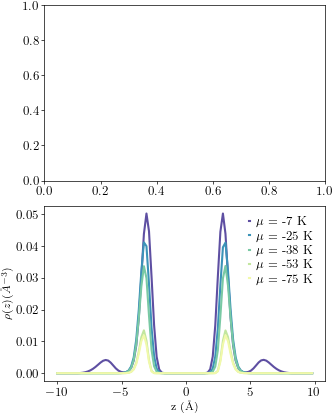

In [8]:
figsize = plt.rcParams['figure.figsize']
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(figsize[0],2*figsize[1]), constrained_layout=True)
for i in range(len(u)):
    if (i % 5 == 0):
        ax2.plot(r[i][:-1],rho[i][:-1], label=r'$\mu$ = %3.f K'% u[i])
ax2.set_ylabel(r'$\rho(z) (Å^{-3}$)')
ax2.set_xlabel('z (Å)')
plt.legend()
plt.savefig('Density-plots.pdf')